# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import duckdb
import fireducks.pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rcParams
rcParams["text.usetex"] = True

# 01: Baseline model without hyperparameter tuning

* In the baseline model category, the models are trained using default hyperparameters without tuning.


## Define metrics filepath

In [2]:
BASELINE_DATASET_METRICS_PATH = Path.cwd().joinpath(
    "eval_metrics_no_hp_severson.csv")

## Plot evaluation metrics for a single cell

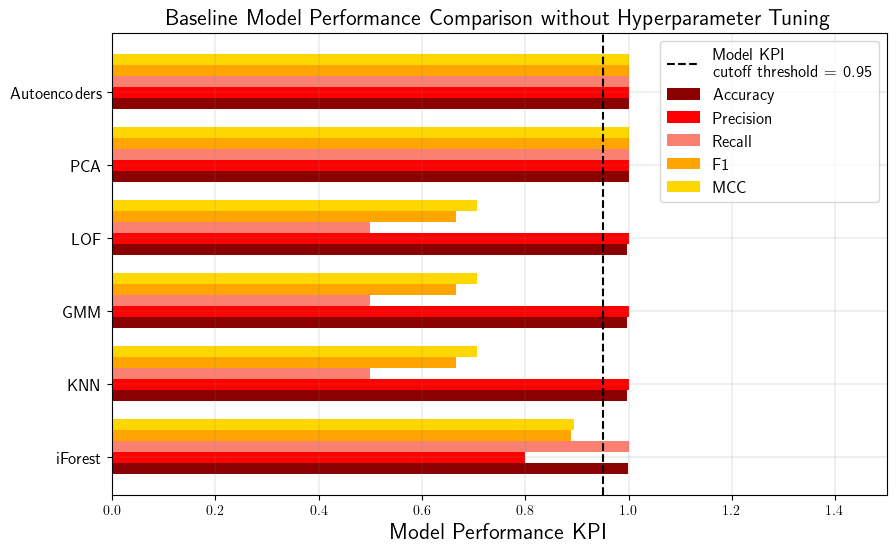

In [4]:
df_eval_metrics_baseline = pd.read_csv(BASELINE_DATASET_METRICS_PATH)

list_acc = df_eval_metrics_baseline["accuracy"].to_list()
list_precision = df_eval_metrics_baseline["precision"].to_list()
list_recall = df_eval_metrics_baseline["recall"].to_list()
list_f1 = df_eval_metrics_baseline["f1_score"].to_list()
list_mcc = df_eval_metrics_baseline["mcc_score"].to_list()

fig, ax = plt.subplots(figsize=(10,6))

bar_width = 0.15

br1 = np.arange(len(list_acc))
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]
br4 = [x + bar_width for x in br3]
br5 = [x + bar_width for x in br4]

ax.barh(br1, list_acc, color="darkred", height=bar_width, label="Accuracy")
ax.barh(br2, list_precision, color="red", height=bar_width, label="Precision")
ax.barh(br3, list_recall, color="salmon", height=bar_width, label="Recall")
ax.barh(br4, list_f1, color="orange", height=bar_width, label="F1")
ax.barh(br5, list_mcc, color="gold", height=bar_width, label="MCC")
ax.grid(color="grey", linestyle="-", linewidth=0.25, alpha=0.7)
ax.set_xlim([0, 1.5])

ax.set_yticks(
    [r + bar_width for r in range(len(list_acc))], 
    ["iForest", "KNN", "GMM", "LOF", "PCA", "Autoencoders"],
    fontsize=12)

ax.set_xlabel("Model Performance KPI", fontsize=16)
ax.set_title(
    "Baseline Model Performance Comparison without Hyperparameter Tuning",
    fontsize=16)

ax.axvline(
    x=0.95,
    color="black",
    linestyle="--",
    label=f"Model KPI \n cutoff threshold = 0.95")

ax.legend(
    fontsize=12,
    loc="upper right")

fig_output_path =  "baseline_model_comparison_single_cell.png"

plt.savefig(
    fig_output_path,
    dpi=600,
    bbox_inches="tight")

plt.show()